# Probabilidad y estadística

## Ejercicios Clase 1

## Referencias

- [Cheatsheet de Latex](https://www.caam.rice.edu/~heinken/latex/symbols.pdf)
- [DRIVE](https://drive.google.com/drive/folders/1TDRvlwfSgLI39gHXgVhWlSaRJ-aTSaDE?usp=sharing)
- [Introducción a la Probabilidad, Bertsekas](https://vfu.bg/en/e-Learning/Math--Bertsekas_Tsitsiklis_Introduction_to_probability.pdf)
- [Introducción a la Machine Learning, Alpaidin](https://kkpatel7.files.wordpress.com/2015/04/alppaydin_machinelearning_2010.pdf)
- Apuntes de Grymberg de Proba 

## Comentarios sobre el estado del documento

## Importar Librerías

In [62]:
# Importar las librerías relevantes
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib_venn import venn2
import math
import numpy.random as random
import scipy.stats as stats
random.seed(42)

%matplotlib inline

## Ejercicios

In [115]:
#Ejercicio 1
"""¿Cu ́al es la probabilidad de obtener exactamente 3 cecas en 10 tiradas
de una moneda balanceada?
(b) ¿Cu ́al es la probabilidad de obtener al menos 3 cecas en 10 tiradas de
una moneda cargada donde la probabilidad de ceca es 0.4?
(c) Una moneda cargada con probabilidad de ceca 0.4 es arrojada al aire.
El resultado es cara. ¿Cu ́al es la probabilidad de obtener al menos 3
cecas en las pr ́oximas 10 tiradas?
(d) Simular los items anteriores en Octave usando: i) una distribuci ́on
uniforme con la funci ́on rand para simular el proceso Bernoulli; ii) las
funciones binopdf,binocdf para calcular la probabilidad binomial
(Octave statistics package)."""


def combinator(n1, m):
    c = math.factorial(n1) / (math.factorial(m) * math.factorial(n1 - m))
    return c


class binomial():
    def __init__(self, n, p):
        self.n = n
        self.p = p

    def prob_exact(self, k):
        P_k = combinator(self.n, k) * self.p**k * (1 - self.p)**(self.n - k)
        return P_k

    def prob_less_eq(self, k):
        P_k = 0
        P_leq_K = 0
        for i in range(1, k):
            P_k = combinator(self.n,
                             i) * self.p**i * (1 - self.p)**(self.n - i)
            P_leq_K += P_k
        return P_leq_K


# Ej 1.a
ej_1 = binomial(10, 0.4)
resp_ej_1 = ej_1.prob_exact(3)
print(
    'La probabilidad teorica de obtener exactamente 3 cecas en 10 tiradas es: {:.2%}'
    .format(resp_ej_1))

# Ej 1.b
ej_1_b = binomial(10, 0.4)
lesseq_than_2 = ej_1_b.prob_less_eq(3)
biggerq_3 = 1 - lesseq_than_2
print(
    'La probabilidad teorica de obtener 3 cecas o más en 10 tiradas es: {:.2%}'
    .format(biggerq_3))

# Ej 1.c
""" 
moneda con p=0.4
11 tiradas
B = Primera tirada es ceca = P(primera tirada ceca) = 0.4
A = probabilidad de =>3 cecas las próximas 10 tiradas = probabilidad que k => 3 cecas en 10 tiradas


P(A|B) = P(A) inter P(B) / P(B)

P(A) inter P(B) = las próximas tiradas son independientes de las pasadas. El proceso "No tiene memoria"

P(A|B) = P(A)P(B) / P(B)

P(A|B) = P(A)

"""


def generate_coin_toss(n, prob_tails):
    Coin_toss = random.uniform(0, 1, size=n) < prob_tails
    return Coin_toss


def generate_k_samples_n_coin_toss(k, n, prob_tails):
    experiment_samples = np.zeros([k])

    for i in range(0, k):
        experiment_samples[i] = np.sum(generate_coin_toss(n, prob_tails))

    return experiment_samples


Samples_vector = generate_k_samples_n_coin_toss(100000, 10, 0.4)

P_simulated_equal_3 = sum(Samples_vector == 3) / len(Samples_vector)
P_simulated_greq_3 = sum(Samples_vector >= 3) / len(Samples_vector)

print(
    'La probabilidad simulada de obtener exactamente 3 cecas en 10 tiradas es: {:.2%}'
    .format(P_simulated_equal_3))
print(
    'La probabilidad simulada de obtener 3 cecas o más en 10 tiradas es: {:.2%}'
    .format(P_simulated_greq_3))

La probabilidad teorica de obtener exactamente 3 cecas en 10 tiradas es: 21.50%
La probabilidad teorica de obtener 3 cecas o más en 10 tiradas es: 83.88%
La probabilidad simulada de obtener exactamente 3 cecas en 10 tiradas es: 21.53%
La probabilidad simulada de obtener 3 cecas o más en 10 tiradas es: 83.24%


### Ejercicio 2
En una competencia se tienen 3 puertas de las cuales se debe elegir
una. Dos puertas tienen la foto de un chancho y la tercera tiene la
foto de un autom ́ovil. Si el participante acierta la puerta del
autom ́ovil, lo gana. En caso contrario, no gana nada. Una vez que el
participante elige una puerta, a ́un con todas las puerta cerradas, el
organizador de la competencia - que sabe en qu ́e puerta se encuentra
la foto del autom ́ovil - abre una de las tres puertas que tiene la foto
de un chancho. ¿Qu ́e le conviene hacer al participante, cambiar su
elecci ́on o no? Justificar usando probabilidad a priori y probabilidad
condicional.


B = Tomo el coche luego del cambio
A = Tomo el coche antes del cambio

  
Por teorema de la probabilidad total:
P(B) = P(B|A).P(A) + P(B|$\overline{A}$).P($\overline{A}$) =  P(B |$\overline{A}$)

- P(B|A) = 0, Son dos hechos contrapuestos, no pueden coexistir
- P($\overline{A}$) = 2/3, Es la probabilidad conjunta de que esté en la puerta 2 y 3.
- P(B|$\overline{A}$) = 1, Si no está en la primera puerta, tiene que estar en la otra

P(B) = 2/3

### Ejercicio 3


Sean X, Y dos v.a. i.i.d. U[0, 1]. Encontrar la expresi ́on de la funci ́on
de densidad de probabilidad conjunta.
(b) ¿Cu ́al es la probabilidad de que X > 0.7 y Y < 0.4 simult ́aneamente?
(c) ¿Cu ́al es el percentil 40 de X, i.e. x40 ?
(d) Simular en Octave escribiendo la pdf conjunta o usando funciones de
Octave rand,unifpdf,unifcdf
(e) Graficar la cdf en funci ́on de x, y

Como las dos funciones son i.i.d, puedo asegurar que cualesquiera que sean los intervalos $(a, b] y (c, d]$,
se verifica que los eventos
{X ∈ (a, b]} y {Y ∈ (c, d]}
son independientes, es decir que
$P(a < X ≤ b, c < Y ≤ d) = P(a < X ≤ b)P(c < Y ≤ d)$


$f_x(x) = 1$

$f_y(y) = 1$

$f_{x,y}(x, y) = 1$

$P(x>0.7, y< 0.4) = \int_0^{0.4} \int_{0.7}^1 1 dx dy = \int_0^{0.4} ( 1 - 0.7) dy  
= (1-0.7)(0.4 - 0) = 0.12$

$F_{x,y}(x, y) = x.y$

Percentil 40 de X:

$F_{x}(x) = x = 0.4     -> el percentil 40 es 0.4$

$F_{x,y}(x, y) = 0.4y = 0.4y$




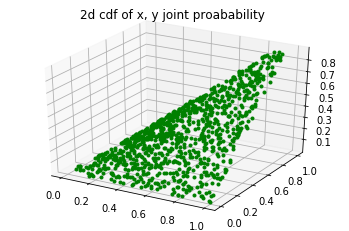

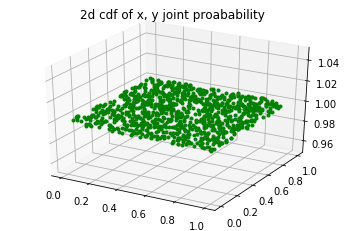

In [170]:
## function creation for simulation


def generate_uniform(n):
    uni_simulations = random.uniform(0, 1, size=n)
    return uni_simulations


def generate_Rn_uniform(k, n):
    experiment_sampl = np.zeros([k, n])
    for i in range(0, k):
        experiment_sampl[i] = generate_uniform(n)
    return experiment_sampl


# Simulation
x, y = generate_Rn_uniform(1000, 2)[:, 0], generate_Rn_uniform(1000, 2)[:, 1]

# Graphic
fig = plt.figure()
ax1 = plt.axes(projection='3d')

_ = plt.title('2d cdf of x, y joint proabability ', c='black')
_ = plt.xticks(c='black')
_ = plt.yticks(c='black')

_ = ax1.plot3D(x, y, x * y, 'green', linestyle='none', marker='.')

plt.show()

fig = plt.figure()
ax2 = plt.axes(projection='3d')

_ = plt.title('2d cdf of x, y joint proabability ', c='black')
_ = plt.xticks(c='black')
_ = plt.yticks(c='black')

_ = ax2.plot3D(x, y, 1, 'green', linestyle='none', marker='.')

plt.show()

In [ ]:
# Ejercicio 4
'''
SeanX, Y dos v.a. i.i.d. N (0, 1). Encontrar la expresi ́on de la funci ́on
de densidad de probabilidad conjunta.
(b) ¿Cu ́al es la probabilidad de que X > 0.7 y Y < 0.4 simult ́aneamente?
(c) Simular en Octave escribiendo la pdf conjunta o usando funciones de
Octave mvnrnd,mvnpdf,mvncdf
(d) Graficar la cdf en funci ́on de x, y
'''

Como las dos funciones son i.i.d, puedo asegurar que cualesquiera que sean los intervalos $(a, b] y (c, d]$,
se verifica que los eventos
{X ∈ (a, b]} y {Y ∈ (c, d]}
son independientes, es decir que
$(1) P(a < X ≤ b, c < Y ≤ d) = P(a < X ≤ b)P(c < Y ≤ d)$

$(2) f_x(x) = \frac{1}{σ_x\sqrt{2π}} . e^{− \frac{1}{2σ^2}(x − µ_x)^2}$

$(3) f_y(y) = \frac{1}{σ_y\sqrt{2π}} . e^{− \frac{1}{2σ^2}(y − µ_y)^2}$

por $(1), (2) y (3): f_{x,y}(x, y) = 
\frac{1}{σ_x\sqrt{2π}} . e^{− \frac{1}{2σ_x^2}(x − µ_x)^2} * 
\frac{1}{σ_y\sqrt{2π}} . e^{− \frac{1}{2σ_y^2}(y − µ_y)^2} $


Reemplazando los valores de las medias y desvíos:

$f_{x,y}(x, y) = 
\frac{1}{2π} . e^{− \frac{1}{2}(x^2 − y^2)} $


### 4.b
$P(x>0.7, y< 0.4) = \int_0^{0.4}  f_y(y) dy \int_{0.7}^1  f_x(x) dx $

$P(x>0.7, y< 0.4) =   F_y(y<0.4) F_x(0.7<x) $


In [43]:
p_y = stats.norm(0, 1).cdf(0.4)
p_x = 1 - stats.norm(0, 1).cdf(0.7)

theoretical_probability = p_x * p_y 

print( "P(x>0.7, y< 0.4)= p_x * P_y = ",round(p_x*p_y, 4))

P(x>0.7, y< 0.4)= p_x * P_y =  0.1586


In [34]:
# Ejercicio 4. c
SIZE = 10000
binorm_simulation = np.vstack([np.random.normal(0,1, size=SIZE), np.random.normal(0,1, size=SIZE)])

In [53]:
successful_simulations = np.sum((binorm_simulation.T[:,0] > 0.7) & (binorm_simulation.T[:,1] < 0.4))
simulated_probability = successful_simulations / SIZE

print('The simulated probability of the exercise is: ', round(simulated_probability, 4))

## Okey.. but now we only know the result of one simulation.. ¿How robust is this answer?
n = 1000
SIZE = 10000

proba_vector = np.zeros(n)

for i in range(n):
    binorm_simulation = np.vstack([np.random.normal(0,1, size=SIZE), np.random.normal(0,1, size=SIZE)])
    successful_simulations = np.sum((binorm_simulation.T[:,0] > 0.7) & (binorm_simulation.T[:,1] < 0.4))
    simulated_probability = successful_simulations / SIZE
    proba_vector[i] = simulated_probability
    
print('the mean of the {} simulations is {} and the std is {:.3}'.format(n, proba_vector.mean(), proba_vector.std()))

The simulated probability of the exercise is:  0.1545
the mean of the 1000 simulations is 0.1586497 and the std is 0.00361


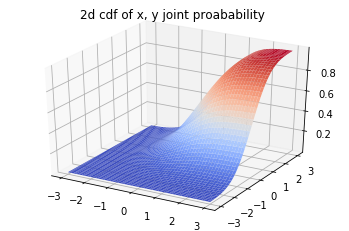

In [121]:
## Ejercicio 4.4

# Itiate the figure and axis

fig = plt.figure()
ax1 = plt.axes(projection='3d')

# Create a mesh of points
X, Y = np.meshgrid(np.linspace(-3,3,1000), np.linspace(-3,3,1000))

# some formatting
_ = plt.title('2d cdf of x, y joint proabability ', c='black')
_ = plt.xticks(c='black')
_ = plt.yticks(c='black')

# plot the 3d surface by computing the joint cdf of each point from the graph 
_ = ax1.plot_surface(X, Y, stats.norm(0, 1).cdf(X)*stats.norm(0, 1).cdf(Y) , cmap=cm.coolwarm)

plt.show()

